In [1]:
from settings import *

random_rho0s: setting seed=57110


In [2]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

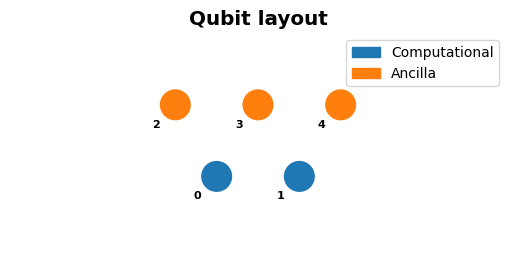

In [3]:
qubits.show_layout()

In [4]:
qubits.gate_connections

[GateConnection(id1=0, id2=1, d=0.9),
 GateConnection(id1=0, id2=2, d=0.9),
 GateConnection(id1=0, id2=3, d=0.9),
 GateConnection(id1=1, id2=3, d=0.9),
 GateConnection(id1=1, id2=4, d=0.9),
 GateConnection(id1=2, id2=3, d=0.9),
 GateConnection(id1=3, id2=4, d=0.9000000000000001)]

In [5]:
theta_init = np.load("both_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=200, n_grad=10, theta_init=theta_init)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=128


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.0025755307735315664 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.08710718e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.85623299e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000

In [7]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

In [8]:
theta_opt

array([0.99227888, 0.8721164 , 1.        , 1.        , 1.        ,
       1.67969326, 1.62397488, 0.81831704, 0.63782596, 0.84034621,
       0.96052331, 0.71990127, 1.41526556, 1.05393255, 1.53182583,
       1.17094298, 0.87693687, 1.01451058, 1.70935234, 1.04342651,
       1.63376934, 0.97732318, 0.77485611, 1.08719225, 0.90081282,
       1.03817104, 0.86153265, 1.17809713, 1.0891772 , 1.02761862,
       0.81022091, 0.61235282, 1.02884975, 0.70425588, 1.07741251,
       1.08445327, 1.23236811, 0.9379114 , 1.04159641, 1.00975698,
       1.19344393, 0.92833188, 0.91203052, 0.91251128, 1.22354027,
       1.37707663, 1.29565091, 1.14280206, 0.74245011, 0.73691251,
       1.1999789 , 1.19477989, 1.27018477, 1.08984692, 1.04093853,
       0.96655785, 1.00187369, 1.01620269, 0.946904  , 1.17322042,
       1.14235996, 0.85729348, 1.28029503, 0.96324967, 1.12054232,
       1.02534973, 1.20776409, 0.97715297, 1.00030681, 1.2932252 ,
       1.38093904, 0.70049272, 1.09730381, 0.69244175, 1.11305

rho_rand_haar: seed=31981


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

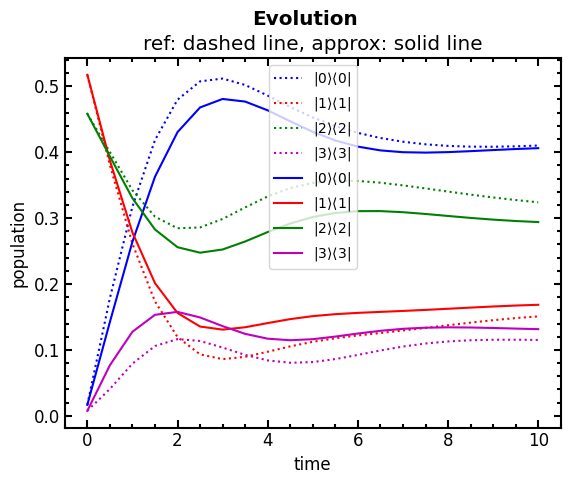

In [12]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(20, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=20, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

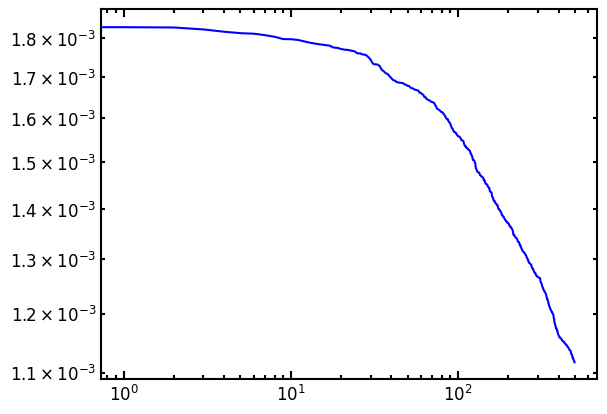

In [10]:
plt.loglog(errors)